## Dataset: Flight Take Off Data - JFK Airport
Context:
This data was scraped under a Academic Paper under Review by IEEE transportation. This file contains data about flights leaving from JKF ariport between Nov 2019-Dec-2020. Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight.

## Aim of Analysis：
1. Design Regression models to predict the Taxt-out values based on the other varibales.
2. Compare the prediction performance of four linear regression models (Lasso, Ridge,Linear, RandomForest) in terms of this dataset.

## Data analysis:
1. Data pre-process

In [51]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import seaborn as sns





In [7]:
##import data
data = pd.read_csv("M1_final.csv")
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [8]:
##replace wind type with degree
wind_dict = {'NNW': 340, 'CALM': 0, 'NNE':20, 'NE':45, 'VAR':0, 'WSW':230, 'S':180, 'SSW':200, 'WNW':290, 'ESE':115, 'N': 360, 'SW':225, 'E':90, 'W':270, 'SSE':155, 'ENE':70, 'NW':315, 'SE':135}

for item in wind_dict:
    data.loc[data['Wind']== item ,'Wind'] = wind_dict[item]

data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,270,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,270,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,270,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,270,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,270,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,360,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,360,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,360,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,360,6,0,30.18,Cloudy,19,23,13


In [28]:
##replace weather condition type with numerical category 
encoder = preprocessing.LabelEncoder()
data['Condition']=encoder.fit_transform(data['Condition'])
data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,270,25,38,29.86,4,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,270,25,38,29.86,4,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,270,25,38,29.86,4,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,270,25,38,29.86,4,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,270,24,35,29.91,4,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,360,6,0,30.18,0,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,360,6,0,30.18,0,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,360,6,0,30.18,0,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,360,6,0,30.18,0,19,23,13


In [29]:
##Convert non-numerical columns to nan, then convert nan to '0'
newdata = data.apply(pd.to_numeric, errors='coerce')
newdata.fillna(0,inplace=True)
newdata


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,0.0,0.0,0.0,-1,124,636,324,...,34.0,58,270.0,25,38,29.86,4,9,17,14
1,11,1,5,0.0,0.0,0.0,-7,371,2475,340,...,34.0,58,270.0,25,38,29.86,4,9,17,15
2,11,1,5,0.0,0.0,0.0,40,181,1069,301,...,34.0,58,270.0,25,38,29.86,4,9,17,22
3,11,1,5,0.0,0.0,0.0,-2,168,944,345,...,34.0,58,270.0,25,38,29.86,4,9,17,12
4,11,1,5,0.0,0.0,0.0,-4,139,760,360,...,32.0,58,270.0,24,35,29.91,4,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,0.0,0.0,0.0,2,57,150,1370,...,38.0,96,360.0,6,0,30.18,0,20,32,19
28816,1,31,5,0.0,0.0,0.0,2,75,187,1390,...,38.0,96,360.0,6,0,30.18,0,19,23,22
28817,1,31,5,0.0,0.0,0.0,283,392,2422,1125,...,38.0,96,360.0,6,0,30.18,0,19,23,21
28818,1,31,5,0.0,0.0,0.0,5,224,1598,1417,...,38.0,96,360.0,6,0,30.18,0,19,23,13


2. Train prediction models

In [14]:
## selct the data
X = newdata.iloc[:,:-1].values
y = newdata.iloc[:, -1].values


In [30]:
##split and train,80%train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)


In [16]:
## STANDARD  SCALER
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Lasso Regression

In [32]:
model_lasso=Lasso(alpha=0.1, random_state= 32)
model_lasso.fit(X_train,y_train)
pred_lasso=model_lasso.predict(X_test)
pred_lasso


array([22.19482681, 22.59571988, 22.55920661, ..., 23.30689083,
       18.56841431, 22.75380723])

In [33]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
0,23,22.194827
1,14,22.595720
2,22,22.559207
3,19,23.887798
4,20,18.195725
...,...,...
5759,18,20.041437
5760,16,19.003023
5761,34,23.306891
5762,17,18.568414


In [34]:
##Accuracy of Lasso
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('Accuracy of lasso model:', metrics.r2_score(y_test, pred_lasso))

MAE: 5.270563331950789
MSE: 43.81024475191431
RMSE: 6.618930786155292
Accuracy of lasso model: 0.08594524283504379


## Ridge Regression

In [35]:
model_ridge = Ridge(alpha=0.1, random_state= 32)
model_ridge.fit(X_train, y_train)
pred_ridge=model_ridge.predict(X_test)
pred_ridge

array([22.19528047, 22.34805139, 22.84727064, ..., 23.38184742,
       18.67841387, 22.8243597 ])

In [36]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})


,Actual,Predicted
0,23,22.195280
1,14,22.348051
2,22,22.847271
3,19,23.806142
4,20,18.041137
...,...,...
5759,18,19.837038
5760,16,19.060933
5761,34,23.381847
5762,17,18.678414


In [37]:
## Accuracy of Ridge
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('Accuracy of ridge model:', metrics.r2_score(y_test, pred_ridge))

MAE: 5.26486311132308
MSE: 43.72622129522644
RMSE: 6.612580532229943
Accuracy of ridge model: 0.08769830403645695


## Linear Regression

In [24]:
model_linear=LinearRegression()
model_linear.fit(X_train,y_train)
pred_linear=model_linear.predict(X_test)
pred_linear

array([22.19527522, 22.34803189, 22.84729335, ..., 23.3818479 ,
       18.67841808, 22.82435988])

In [25]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred_linear})

,Actual,Predicted
0,23,22.195275
1,14,22.348032
2,22,22.847293
3,19,23.806144
4,20,18.041128
...,...,...
5759,18,19.837026
5760,16,19.060942
5761,34,23.381848
5762,17,18.678418


In [38]:
##Accuracy of Linear Regresion
print('MAE:', metrics.mean_absolute_error(y_test, pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_linear)))
print('Accuracy of simple linear regression:', metrics.r2_score(y_test, pred_linear))

MAE: 5.264862985282851
MSE: 43.72621893800376
RMSE: 6.612580353992212
Accuracy of simple linear regression: 0.08769835321743302


## Random Foresst Regression

In [45]:

model_rf = RandomForestRegressor(n_estimators=100, random_state=32)
model_rf.fit(X_train, y_train)
pred_rf=model_rf.predict(X_test)
pred_rf

array([24.95, 19.17, 25.12, ..., 32.86, 17.33, 22.08])

In [46]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred_rf})

,Actual,Predicted
0,23,24.95
1,14,19.17
2,22,25.12
3,19,17.88
4,20,20.45
...,...,...
5759,18,18.62
5760,16,20.42
5761,34,32.86
5762,17,17.33


In [47]:
##Accuracy of  Random Foresst Regression
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('Accuracy of simple linear regression:', metrics.r2_score(y_test, pred_rf))

MAE: 4.3812994448299785
MSE: 31.92753062109646
RMSE: 5.65044517016991
Accuracy of simple linear regression: 0.33386559664294413


## Comparison of four linear regression models:
Random Foresst Regression(≈33%) have significantly better performance than the other 3 models. However, the prediction accuracy of all the model above are at a relatively low level. One assumption for the bad prediction performance is that there is a weak correlation between the predictor 'Taxt_out' and other features (See below).

In [27]:
## correlation matrix
corr_matrix = data.corr()
corr_matrix

C:\Users\V\AppData\Local\Temp\ipykernel_22560\2038464935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,0.045347,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,0.024828,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.062235,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.000838,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,-0.001969,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,-0.002025,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,0.019744,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.023639,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.033443,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,0.072278,-0.022534,0.075958,-0.067574


<AxesSubplot: >

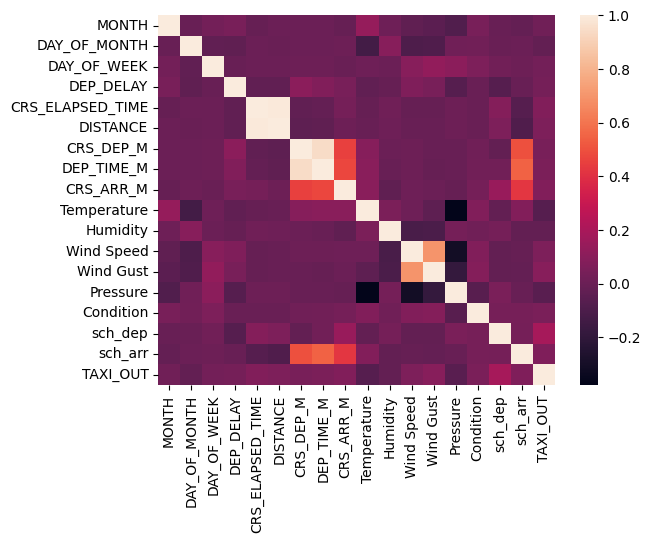

In [50]:
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)